<a href="https://colab.research.google.com/github/myschl/ML-DL/blob/master/Cyber_Attack_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries to be use**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, cross_val_predict
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from keras.utils import to_categorical

# %tensorflow_version 1.x

Using TensorFlow backend.


# **Getting the data**

In [0]:
from zipfile import ZipFile
file_name = '/content/drive/My Drive/SS_Thesis/10-best Training-Testing split.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")


Done


In [0]:
train = pd.read_csv('/content/10-best Training-Testing split/UNSW_2018_IoT_Botnet_Final_10_best_Training.csv')
test = pd.read_csv('/content/10-best Training-Testing split/UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv')

train.head()


,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,UDP


In [0]:
train.columns

Index(['pkSeqID', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'seq', 'stddev',
       'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max', 'attack', 'category', 'subcategory'],
      dtype='object')

In [0]:
test.columns

Index(['pkSeqID', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'seq', 'stddev',
       'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max', 'attack', 'category', 'subcategory'],
      dtype='object')

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')
features = ['srate','drate','max','state_number','mean','min','stddev']
train_data = train[features]
train_labels = train['category']
# train_labels = to_categorical(train_labels)

test_data = test[features]
test_labels = test['category']
# test_labels = to_categorical(test_labels)




In [0]:
train_labels.unique()

array(['DDoS', 'DoS', 'Reconnaissance', 'Normal', 'Theft'], dtype=object)

In [0]:
# # creating initial dataframe
# labels = ('DoS', 'Reconnaissance','DDoS')
# train_labels = pd.DataFrame(train_labels, columns=['labels'])
# test_labels = pd.DataFrame(labels, columns=['labels'])

# # creating instance of labelencoder
# labelencoder = LabelEncoder()
# # Assigning numerical values and storing in another column
# train_labels['labels_Cat'] = labelencoder.fit_transform(train_labels['labels'])
# test_labels['labels_Cat'] = labelencoder.fit_transform(train_labels['labels'])
# train_labels



# creating instance of labelencoder
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels.astype('str'))
test_labels = label_encoder.transform(test_labels.astype('str'))

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_labels

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [0]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data = sc.fit_transform(train_data)
test_data = sc.transform(test_data)

train_data

array([[-0.00335701, -0.0076522 ,  0.54400662, ...,  0.30113222,
        -0.6856577 ,  1.26101287],
       [-0.00366044, -0.0076522 ,  0.53396048, ...,  1.12300345,
         1.91413882, -1.00662223],
       [-0.00361151, -0.0076522 ,  0.31701393, ...,  0.73196946,
         1.31905974, -0.76937267],
       ...,
       [-0.00372296, -0.0076522 ,  0.70575289, ..., -0.07886912,
        -0.6856577 ,  1.52464493],
       [-0.00378072, -0.0076522 , -1.6224652 , ..., -1.46957517,
        -0.6856577 , -1.10368447],
       [-0.00383902, -0.00696229, -1.52981828, ..., -1.3914419 ,
        -0.64200095, -1.0367141 ]])

# **Preprocessing the Data**

In [0]:
# finding missing and categorical values
col_missing_values = [col for col in train_data.columns
                     if train_data[col].isnull().any() and train_data[col].dtype]

# col wit numerical values which is null in this project
col_numerical_values = [col for col in train_data.columns if train_data[col].dtype in ['int64', 'float64']]

# col with categorical values
col_categorical_values = [col for col in train_data.columns 
                          if train_data[col].dtype == 'object']

#missing values cout per col
missing_val_count_by_column = (train_data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
print(col_categorical_values)
print(col_numerical_values)


In [0]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore')
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_data[col_categorical_values]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(test_data[col_categorical_values]))

# One-hot encoding removed index; put it back
OH_cols_train.index = train_data.index
OH_cols_valid.index = test_data.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = train_data.drop(col_categorical_values, axis=1)
num_X_valid = test_data.drop(col_categorical_values, axis=1)

# Add one-hot encoded columns to numerical features
train_data = pd.concat([num_X_train, OH_cols_train], axis=1)
test_data = pd.concat([num_X_valid, OH_cols_valid], axis=1)



# **Model Evaluation**

In [0]:
def get_Evaluation_matrics(preds, orig_test_labels):
  # Get the confusion matrix
  cm  = confusion_matrix(orig_test_labels, preds)
  plt.figure()
  plot_confusion_matrix(cm,figsize=(12,12), hide_ticks=True,cmap=plt.cm.Blues)
  plt.xticks(range(5), ['DDoS', 'DoS', 'Reconnaissance', 'Normal', 'Theft'], fontsize=16)
  plt.yticks(range(5), ['DDoS', 'DoS', 'Reconnaissance', 'Normal', 'Theft'], fontsize=16)
  plt.show()

  # Calculate Precision and Recall
  tn, fp, fn, tp = cm.ravel()
  Accuracy = (tp+tn)/(tp+tn+fp+fn)
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  specificity = tn/(tn+fp)
  F1_score = 2*tp/(2*tp+fp+fn)

  print("Accuracy of the model is {:.2f}".format(Accuracy))
  print("Recall of the model is {:.2f}".format(recall))
  print("Precision of the model is {:.2f}".format(precision))
  print("specificity of the model is {:.2f}".format(specificity))
  print("F1_score of the model is {:.2f}".format(F1_score))

# **Model Prediction**

In [0]:
def get_Model_prediction(model, test_data, test_labels):
  import numpy as np

  # # Evaluation on test dataset
  # test_loss, test_score = model.evaluate(test_data, test_labels, batch_size=32)
  # print("Loss on test set: ", test_loss)
  # print("Accuracy on test set: ", test_score)
  
  preds = model.predict(test_data, batch_size=32)
  preds = np.argmax(preds, axis=-1)

  orig_test_labels = np.argmax(test_labels, axis=-1)

  print(orig_test_labels)
  print(preds)

  return preds, orig_test_labels

# **Model ROC and AUC value**

In [0]:
def get_model_ROC_AUC_curve(model_pred, test_labels, label=None):
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, thresholds = roc_curve(test_labels, model_pred)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')

    auc_score = auc(fpr, tpr)
    print('AUC Score : ', auc_score)

# **Plotting Model Loss**

In [0]:
def plot_Model_loss(History):
  history_dict2 = History.history
  loss_values2 = history_dict2['loss']
  val_loss_values2 = history_dict2['val_loss']

  epochs = range(1, 50 + 1)
  plt.plot(epochs, loss_values2, 'b-', label='training loos')
  plt.plot(epochs, val_loss_values2, 'r-', label='validation loss')
  plt.title('trainin/validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.rcParams['axes.facecolor'] = 'white'
  plt.rcParams['axes.edgecolor'] = 'white'
  plt.rcParams['axes.grid'] = True
  plt.rcParams['grid.alpha'] = 1
  plt.rcParams['grid.color'] = "#cccccc"
  plt.show()

# **Plotting Model Accuracy**

In [0]:
def plot_Model_Accuracy(History):
  history_dict2 = History.history
  acc_values2 = history_dict2['accuracy']
  val_acc_values2 = history_dict2['val_accuracy']

  epochs = range(1, 50 + 1)
  plt.plot(epochs, acc_values2, 'b-', label='training Accuracy')
  plt.plot(epochs, val_acc_values2, 'r-', label='validation Accuracy')
  plt.title('trainin/validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.rcParams['axes.facecolor'] = 'white'
  plt.rcParams['axes.edgecolor'] = 'white'
  plt.rcParams['axes.grid'] = True
  plt.rcParams['grid.alpha'] = 1
  plt.rcParams['grid.color'] = "#cccccc"
  plt.show()

# **Model Building**

In [0]:
#model to use
# model = XGBClassifier()
model = GradientBoostingClassifier(learning_rate= 0.4, random_state= 123, max_depth= 20)
#model = DecisionTreeClassifier(random_state = 1)
# model = RandomForestClassifier(random_state = 1)

# fitting the model
model.fit(train_data, train_labels)

# predicting the model
pred = model.predict(test_data)

# print(y_valid)
print(pred)

get_Evaluation_matrics(pred, test_labels)
acc = accuracy_score(pred, test_labels)
precision = precision_score(pred, test_labels)
recall = recall_score(pred, test_labels)

print(acc)
print(precision)
print(recall)


# **ANN**

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(512, input_shape = (7,), activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_history = model.fit(train_data,
                          train_labels,
                          epochs=50,
                          batch_size=512,
                          validation_data=(test_data, test_labels))


Epoch 1/50
5733/5733 [==============================] - 29s 5ms/step - loss: 0.1293 - accuracy: 0.9355 - val_loss: 0.1104 - val_accuracy: 0.9435
Epoch 2/50
5733/5733 [==============================] - 30s 5ms/step - loss: 0.1261 - accuracy: 0.9365 - val_loss: 0.1161 - val_accuracy: 0.9408
Epoch 3/50
5733/5733 [==============================] - 29s 5ms/step - loss: 0.1246 - accuracy: 0.9371 - val_loss: 0.1440 - val_accuracy: 0.9200
Epoch 4/50
5733/5733 [==============================] - 29s 5ms/step - loss: 0.1270 - accuracy: 0.9360 - val_loss: 0.2600 - val_accuracy: 0.9153
Epoch 5/50
5733/5733 [==============================] - 29s 5ms/step - loss: 0.1302 - accuracy: 0.9353 - val_loss: 0.1217 - val_accuracy: 0.9388
Epoch 6/50
5733/5733 [==============================] - 29s 5ms/step - loss: 0.1278 - accuracy: 0.9372 - val_loss: 0.3354 - val_accuracy: 0.9144
Epoch 7/50
5733/5733 [==============================] - 29s 5ms/step - loss: 0.1284 - accuracy: 0.9359 - val_loss: 0.1179 - val_ac

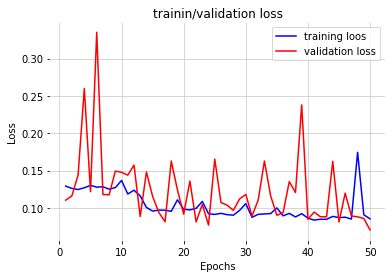

In [0]:
results = model.evaluate(test_data, test_labels)
preds, original_test_labels = get_Model_prediction(model, test_data, test_labels)
get_Evaluation_matrics(pred, original_test_labels)
get_model_ROC_AUC_curve(preds, test_labels)
plot_Model_Accuracy(model_history)
plot_Model_loss(model_history)

In [0]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

In [0]:
# Testing Options
seed = 8
scoring = 'accuracy'

# Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, train_data, train_labels, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [0]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(train_data, train_labels)
    predictions = model.predict(test_data)
    print(name)
    print(accuracy_score(test_labels, predictions))
    print(classification_report(y_test, predictions))